# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc, plot_graph

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [30]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [21]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [22]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(())
sigmoidMLP.add(FCLayer(128, 10))

In [24]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.1634	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.2468	 Accuracy 0.1137
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.9298	 Accuracy 0.1278
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.8132	 Accuracy 0.1409
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.7475	 Accuracy 0.1519
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.7027	 Accuracy 0.1649
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.6687	 Accuracy 0.1803
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.6439	 Accuracy 0.1914
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.6229	 Accuracy 0.2044
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.6053	 Accuracy 0.2158
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.5897	 Accuracy 0.2298

Epoch [0]	 Average training loss 0.5755	 Average training accuracy 0.2452
Epoch [0]	 Average validation loss 0.4195	 Average validation accuracy 0.4198

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.4114	 Accuracy 0.3900

In [25]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8130.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [ ]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [ ]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.8844	 Accuracy 0.1200
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.2832	 Accuracy 0.0845
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.8672	 Accuracy 0.0891
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.6585	 Accuracy 0.1005
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.5195	 Accuracy 0.1113
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.4174	 Accuracy 0.1239
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.3340	 Accuracy 0.1382
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.2658	 Accuracy 0.1526
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.2092	 Accuracy 0.1669
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.1611	 Accuracy 0.1807
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.1188	 Accuracy 0.1942

Epoch [0]	 Average training loss 1.0809	 Average training accuracy 0.2080
Epoch [0]	 Average validation loss 0.6688	 Average validation accuracy 0.3626

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.6579	 Accuracy 0.4100

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8633.



## 绘制曲线

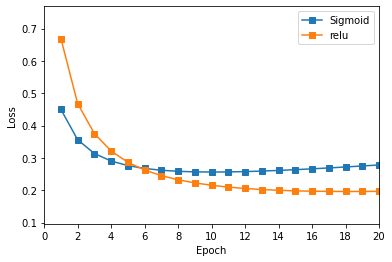

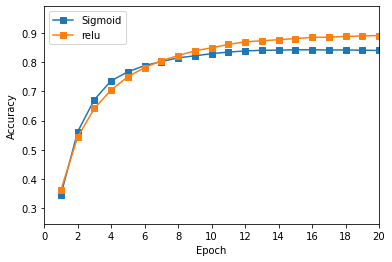

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [ ]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [ ]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [ ]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4653	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4941	 Accuracy 0.0939
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4538	 Accuracy 0.0971
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4275	 Accuracy 0.0996
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4050	 Accuracy 0.1036
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3837	 Accuracy 0.1114
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3672	 Accuracy 0.1192
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.3523	 Accuracy 0.1268
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3371	 Accuracy 0.1352
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3236	 Accuracy 0.1438
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3102	 Accuracy 0.1544

Epoch [0]	 Average training loss 2.2981	 Average training accuracy 0.1655
Epoch [0]	 Average validation loss 2.1662	 Average validation accuracy 0.2794

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1413	 Accuracy 0.2900

### 测试

In [ ]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7311.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [34]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [35]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5937	 Accuracy 0.0900
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5514	 Accuracy 0.0692
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4865	 Accuracy 0.0827
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4373	 Accuracy 0.1002
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3887	 Accuracy 0.1184
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3497	 Accuracy 0.1361
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3108	 Accuracy 0.1551
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2779	 Accuracy 0.1726
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2446	 Accuracy 0.1935
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.2166	 Accuracy 0.2113
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1871	 Accuracy 0.2303

Epoch [0]	 Average training loss 2.1604	 Average training accuracy 0.2477
Epoch [0]	 Average validation loss 1.8493	 Average validation accuracy 0.4560

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.8256	 Accuracy 0.4800

In [38]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8633.



## 绘制曲线

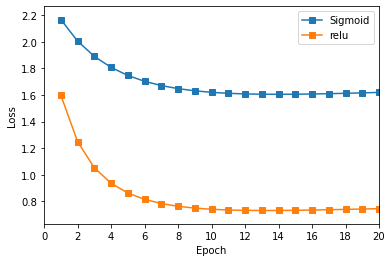

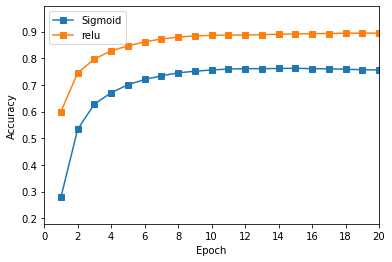

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

In [ ]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

In [39]:
from criterion import EuclideanLossLayer, SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, ReLULayer, SigmoidLayer 

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

model_2hidden = Network()
model_2hidden.add(FCLayer(784, 128))
model_2hidden.add(ReLULayer())
model_2hidden.add(FCLayer(128, 64))
model_2hidden.add(ReLULayer())
model_2hidden.add(FCLayer(64, 10))

In [40]:
model_2hidden, model_2hidden_loss, model_2hidden_acc = train(model_2hidden, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7220	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.6046	 Accuracy 0.1359
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4883	 Accuracy 0.1626
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4184	 Accuracy 0.1773
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3581	 Accuracy 0.1921
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3060	 Accuracy 0.2061
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2563	 Accuracy 0.2211
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2176	 Accuracy 0.2335
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1788	 Accuracy 0.2489
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1439	 Accuracy 0.2640
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1107	 Accuracy 0.2790

Epoch [0]	 Average training loss 2.0784	 Average training accuracy 0.2943
Epoch [0]	 Average validation loss 1.7097	 Average validation accuracy 0.4616

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6990	 Accuracy 0.5000

In [41]:
test(model_2hidden, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8607.



In [31]:
model_nohidden = Network()
model_nohidden.add(FCLayer(784, 10))

#### 单层模型 即softmax

In [32]:
model_nohidden, model_nohidden_loss, model_nohidden_acc = train(model_nohidden, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5431	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4397	 Accuracy 0.1251
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4105	 Accuracy 0.1229
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3741	 Accuracy 0.1302
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3414	 Accuracy 0.1429
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3136	 Accuracy 0.1529
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2861	 Accuracy 0.1632
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2603	 Accuracy 0.1758
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2363	 Accuracy 0.1879
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.2115	 Accuracy 0.2010
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1882	 Accuracy 0.2148

Epoch [0]	 Average training loss 2.1645	 Average training accuracy 0.2296
Epoch [0]	 Average validation loss 1.8869	 Average validation accuracy 0.4138

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.9197	 Accuracy 0.4100

In [33]:
test(model_nohidden, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8629.



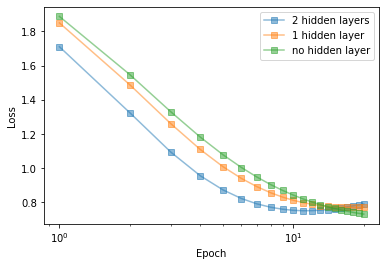

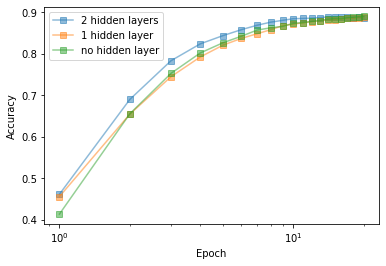

In [42]:
plot_loss_and_acc({'2 hidden layers': [model_2hidden_loss, model_2hidden_acc],
                   '1 hidden layer': [relu_loss, relu_acc],
                   'no hidden layer': [model_nohidden_loss, model_nohidden_acc]})

## 超参调整

In [ ]:
reluMLP = Network()
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

In [ ]:
batch_sizes = [1, 10, 100, 1000]
losses, accs = [], []
for batch_size in batch_sizes:
    reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
    losses.append(relu_loss)
    accs.append(relu_acc)

Epoch [0][20]	 Batch [0][55000]	 Training Loss 2.5450	 Accuracy 0.0000
Epoch [0][20]	 Batch [50][55000]	 Training Loss 2.5936	 Accuracy 0.0392
Epoch [0][20]	 Batch [100][55000]	 Training Loss 2.5607	 Accuracy 0.0990
Epoch [0][20]	 Batch [150][55000]	 Training Loss 2.4948	 Accuracy 0.1126
Epoch [0][20]	 Batch [200][55000]	 Training Loss 2.4117	 Accuracy 0.1443
Epoch [0][20]	 Batch [250][55000]	 Training Loss 2.3514	 Accuracy 0.1554
Epoch [0][20]	 Batch [300][55000]	 Training Loss 2.3195	 Accuracy 0.1794
Epoch [0][20]	 Batch [350][55000]	 Training Loss 2.2729	 Accuracy 0.1966
Epoch [0][20]	 Batch [400][55000]	 Training Loss 2.2276	 Accuracy 0.2244
Epoch [0][20]	 Batch [450][55000]	 Training Loss 2.1829	 Accuracy 0.2528
Epoch [0][20]	 Batch [500][55000]	 Training Loss 2.1550	 Accuracy 0.2635
Epoch [0][20]	 Batch [550][55000]	 Training Loss 2.1372	 Accuracy 0.2686
Epoch [0][20]	 Batch [600][55000]	 Training Loss 2.1040	 Accuracy 0.2845
Epoch [0][20]	 Batch [650][55000]	 Training Loss 2.090

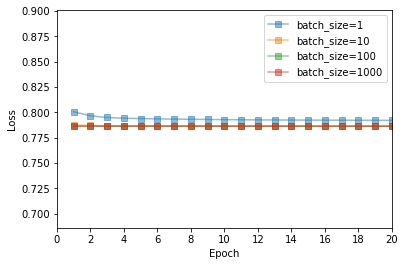

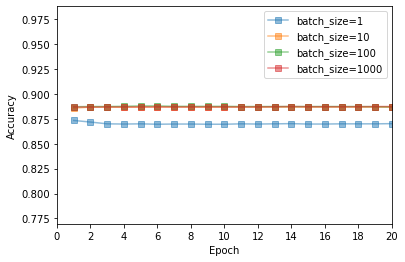

In [ ]:
plot_loss_and_acc({'batch_size=1': [losses[0], accs[0]], 
                   'batch_size=10': [losses[1], accs[1]],
                   'batch_size=100': [losses[2], accs[2]],
                    'batch_size=1000':[losses[3], accs[3]]})

In [ ]:
learning_rates = [0.0005, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1]
losses, accs = [], []
for learning_rate in learning_rates:
    sgd = SGD(learning_rate, weight_decay)
    reluMLP, relu_loss, relu_acc = train(model=reluMLP, criterion=criterion, optimizer=sgd, dataset=data_train, max_epoch=max_epoch, batch_size=100, disp_freq=disp_freq)
    losses.append(relu_loss)
    accs.append(relu_acc)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.8236	 Accuracy 0.8500
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.8325	 Accuracy 0.8586
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.8368	 Accuracy 0.8582
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.8439	 Accuracy 0.8526
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.8478	 Accuracy 0.8520
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.8457	 Accuracy 0.8525
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.8453	 Accuracy 0.8523
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.8510	 Accuracy 0.8521
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.8509	 Accuracy 0.8520
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.8525	 Accuracy 0.8515
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.8531	 Accuracy 0.8512

Epoch [0]	 Average training loss 0.8528	 Average training accuracy 0.8505
Epoch [0]	 Average validation loss 0.7863	 Average validation accuracy 0.8872

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.8236	 Accuracy 0.8500

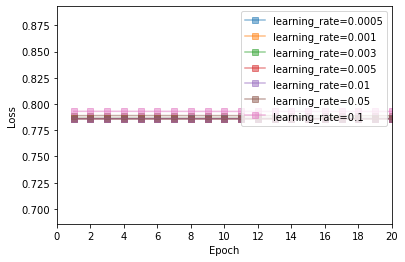

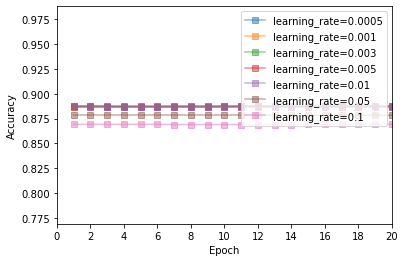

In [ ]:
plot_loss_and_acc({'learning_rate=0.0005': [losses[0], accs[0]], 
                   'learning_rate=0.001': [losses[1], accs[1]],
                   'learning_rate=0.003': [losses[2], accs[2]],
                    'learning_rate=0.005': [losses[3], accs[3]],
                    'learning_rate=0.01': [losses[4], accs[4]],
                    'learning_rate=0.05': [losses[5], accs[5]],
                    'learning_rate=0.1': [losses[6], accs[6]]})

In [ ]:
# Max epochs
reluMLP, relu_loss, relu_acc = train(model=reluMLP, criterion=criterion, optimizer=SGD(0.001, 0.1), dataset=data_train, max_epoch=100, batch_size=100, disp_freq=disp_freq)

Epoch [0][100]	 Batch [0][550]	 Training Loss 2.5152	 Accuracy 0.1100
Epoch [0][100]	 Batch [50][550]	 Training Loss 2.5661	 Accuracy 0.1094
Epoch [0][100]	 Batch [100][550]	 Training Loss 2.5010	 Accuracy 0.1196
Epoch [0][100]	 Batch [150][550]	 Training Loss 2.4432	 Accuracy 0.1287
Epoch [0][100]	 Batch [200][550]	 Training Loss 2.3931	 Accuracy 0.1436
Epoch [0][100]	 Batch [250][550]	 Training Loss 2.3431	 Accuracy 0.1631
Epoch [0][100]	 Batch [300][550]	 Training Loss 2.2997	 Accuracy 0.1834
Epoch [0][100]	 Batch [350][550]	 Training Loss 2.2610	 Accuracy 0.2039
Epoch [0][100]	 Batch [400][550]	 Training Loss 2.2238	 Accuracy 0.2236
Epoch [0][100]	 Batch [450][550]	 Training Loss 2.1914	 Accuracy 0.2396
Epoch [0][100]	 Batch [500][550]	 Training Loss 2.1588	 Accuracy 0.2569

Epoch [0]	 Average training loss 2.1282	 Average training accuracy 0.2726
Epoch [0]	 Average validation loss 1.7580	 Average validation accuracy 0.4650

Epoch [1][100]	 Batch [0][550]	 Training Loss 1.6530	 Acc

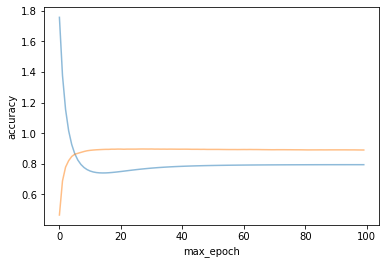

In [ ]:
max_epoch = 100
plot_graph({
    "x": { "max_epoch": [i for i in range(max_epoch)]}, 
    "y": [{ "loss": relu_loss }, 
          { "accuracy": relu_acc }]
    })

In [ ]:
weight_decays = [1.0, 0.1, 0.001, 0.0001]
losses, accs = [], []
for weight_decay in weight_decays:
    reluMLP, relu_loss, relu_acc = train(model=reluMLP, criterion=criterion, optimizer=SGD(0.001, weight_decay), dataset=data_train, max_epoch=200, batch_size=100, disp_freq=disp_freq)
    losses.append(relu_loss)
    accs.append(relu_acc)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-11 16:37:22.673392: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-11 16:37:22.674000: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-11 16:37:22.900439: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch [0][200]	 Batch [0][550]	 Training Loss 2.5871	 Accuracy 0.1100
Epoch [0][200]	 Batch [50][550]	 Training Loss 2.5545	 Accuracy 0.1210
Epoch [0][200]	 Batch [100][550]	 Training Loss 2.4717	 Accuracy 0.1324
Epoch [0][200]	 Batch [150][550]	 Training Loss 2.4144	 Accuracy 0.1500
Epoch [0][200]	 Batch [200][550]	 Training Loss 2.3677	 Accuracy 0.1646
Epoch [0][200]	 Batch [250][550]	 Training Loss 2.3288	 Accuracy 0.1814
Epoch [0][200]	 Batch [300][550]	 Training Loss 2.2958	 Accuracy 0.1971
Epoch [0][200]	 Batch [350][550]	 Training Loss 2.2700	 Accuracy 0.2118
Epoch [0][200]	 Batch [400][550]	 Training Loss 2.2480	 Accuracy 0.2284
Epoch [0][200]	 Batch [450][550]	 Training Loss 2.2293	 Accuracy 0.2467
Epoch [0][200]	 Batch [500][550]	 Training Loss 2.2135	 Accuracy 0.2638

Epoch [0]	 Average training loss 2.1999	 Average training accuracy 0.2814
Epoch [0]	 Average validation loss 2.0498	 Average validation accuracy 0.4980

Epoch [1][200]	 Batch [0][550]	 Training Loss 2.0309	 Acc

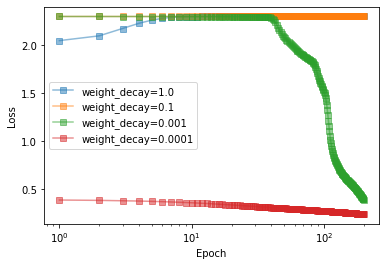

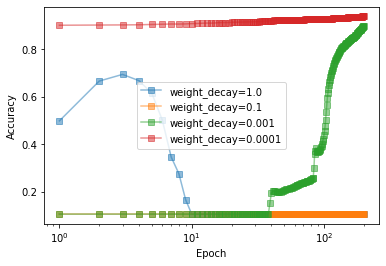

In [29]:
plot_loss_and_acc({'weight_decay=1.0': [losses[0], accs[0]], 
                   'weight_decay=0.1': [losses[1], accs[1]],
                   'weight_decay=0.001': [losses[2], accs[2]],
                    'weight_decay=0.0001': [losses[3], accs[3]]})

## 最终模型训练

In [5]:
batch_size = 100
max_epoch = 25
init_std = 0.01

learning_rate_SGD = 0.005
weight_decay = 0.00001

disp_freq = 50

In [6]:
from criterion import EuclideanLossLayer, SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, ReLULayer, SigmoidLayer 

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

In [7]:
final_model = Network()
final_model.add(FCLayer(784, 128))
final_model.add(ReLULayer())
final_model.add(FCLayer(128, 10))

In [8]:
final_model, final_model_loss, final_model_acc = train(final_model, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)


Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-13 17:16:55.594127: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-13 17:16:55.594442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-13 17:16:55.864165: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch [0][25]	 Batch [0][550]	 Training Loss 2.7192	 Accuracy 0.1000
Epoch [0][25]	 Batch [50][550]	 Training Loss 2.3113	 Accuracy 0.1800
Epoch [0][25]	 Batch [100][550]	 Training Loss 2.1233	 Accuracy 0.2690
Epoch [0][25]	 Batch [150][550]	 Training Loss 1.9763	 Accuracy 0.3496
Epoch [0][25]	 Batch [200][550]	 Training Loss 1.8552	 Accuracy 0.4126
Epoch [0][25]	 Batch [250][550]	 Training Loss 1.7468	 Accuracy 0.4662
Epoch [0][25]	 Batch [300][550]	 Training Loss 1.6532	 Accuracy 0.5089
Epoch [0][25]	 Batch [350][550]	 Training Loss 1.5784	 Accuracy 0.5418
Epoch [0][25]	 Batch [400][550]	 Training Loss 1.5075	 Accuracy 0.5704
Epoch [0][25]	 Batch [450][550]	 Training Loss 1.4461	 Accuracy 0.5935
Epoch [0][25]	 Batch [500][550]	 Training Loss 1.3898	 Accuracy 0.6135

Epoch [0]	 Average training loss 1.3392	 Average training accuracy 0.6309
Epoch [0]	 Average validation loss 0.7276	 Average validation accuracy 0.8492

Epoch [1][25]	 Batch [0][550]	 Training Loss 0.8073	 Accuracy 0.8300

In [9]:
test(final_model, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9349.

